In [1]:
import os

In [2]:
import problem
import workflow.local_workflow as local_workflow
from workflow.scores import score_craters_on_patch

In [3]:
workflow = local_workflow.ObjectDetector(
    test_batch_size=16,
    chunk_size=50,
    n_jobs=8)

In [4]:
submission = 'image_processing'

In [5]:
module_path = os.path.join('.', 'submissions', submission)

In [6]:
X_train, y_train = problem.get_train_data(path='.')
X_test, y_test = problem.get_test_data(path='.')

In [7]:
trained_workflow = workflow.train_submission(
            module_path, X_train, y_train, train_is=None)

In [8]:
%pdb

Automatic pdb calling has been turned ON


In [9]:
y_pred_train = workflow.test_submission(trained_workflow, X_train[:100])

Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.4375
Max val:  0.4375
Max val:  0.515625
Max val:  0.515625
Max val:  0.4625
Max val:  0.46875
Max val:  0.4375
Max val:  0.375
Max val:  0.486111111111
Max val:  0.46875
Max val:  0.453125
Max val:  0.421875
Max val:  0.402777777778
Max val:  0.347222222222
Max val:  0.375
Max val:  0.296875
Max val:  0.375
Max val:  0.40625
Max val:  0.390625
Max val:  0.359375
Max val:  0.375
Max val:  0.265625
Max val:  0.203125
Max val:  0.15625
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.15625
Max val:  0.15625
Max val:  0.234375
Max val:  0.3
Max val:  0.458333333333
Max val:  0.359375
Max val:  0.325
Max val:  0.15625
Max val:  0.472222222222


In [10]:
y_pred_train

[[],
 [],
 [],
 [(166, 56, 10)],
 [(127, 12, 10), (131, 54, 11), (65, 166, 10)],
 [(197, 173, 10),
  (127, 141, 10),
  (126, 140, 11),
  (196, 173, 11),
  (199, 174, 10)],
 [(23, 173, 10),
  (153, 139, 10),
  (22, 173, 11),
  (154, 147, 10),
  (25, 174, 10),
  (115, 94, 11)],
 [(54, 58, 13),
  (106, 183, 13),
  (52, 142, 10),
  (106, 75, 13),
  (60, 66, 10),
  (190, 94, 10),
  (54, 57, 12),
  (98, 98, 12),
  (105, 183, 12)],
 [(85, 94, 10),
  (121, 67, 11),
  (123, 126, 10),
  (123, 128, 10),
  (101, 127, 12),
  (85, 88, 15),
  (167, 74, 10),
  (189, 167, 10),
  (196, 170, 10),
  (90, 128, 12),
  (85, 93, 11)],
 [(136, 79, 10),
  (108, 108, 10),
  (57, 171, 10),
  (61, 181, 10),
  (22, 170, 10),
  (64, 173, 10),
  (15, 181, 10),
  (114, 133, 12),
  (100, 116, 11)],
 [],
 [(70, 182, 11), (69, 183, 10), (54, 185, 10), (55, 186, 12)],
 [(182, 182, 10)],
 [(187, 184, 10)],
 [(13, 184, 10)],
 [(189, 152, 11)],
 [],
 [],
 [],
 [],
 [(159, 194, 10)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [

In [20]:
[score_craters_on_patch(t, p) for t, p in zip(y_true, y_pred_train)]

[1,
 1,
 1,
 0,
 0,
 0,
 0.0862824514051308,
 0,
 0.0,
 0.0,
 1,
 0.0,
 0,
 0,
 0,
 0.0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0.48387046762766994]

In [33]:
np.mean([score_craters_on_patch(t, p) for t, p in zip(y_true, y_pred_train[:60])])

0.75950254865054667

In [22]:
from workflow.predictions import Predictions
from workflow.scores import Ospa

In [30]:
predictions_test = problem.Predictions(y_pred=y_pred_train[:60])
ground_truth_test = problem.Predictions(y_true=y_true)

In [24]:
%pdb

Automatic pdb calling has been turned OFF


In [31]:
score_type = Ospa()

In [28]:
len(y_pred_train)

100

In [29]:
len(y_true)

60

In [32]:
score_type.score_function(ground_truth_test, predictions_test)

0.082054421304741443

In [68]:
from skimage.draw import circle_perimeter
from skimage import data, color

In [60]:
img = np.zeros((224, 224))
img = color.gray2rgb(img)

for center_y, center_x, radius in p:
    circy, circx = circle_perimeter(int(center_y), int(center_x), int(radius))
    img[circy, circx] = (220, 20, 20)
    
for center_y, center_x, radius in t:
    circy, circx = circle_perimeter(int(center_y), int(center_x), int(radius))
    img[circy, circx] = (20, 220, 20)

In [61]:
%matplotlib inline

In [62]:
import matplotlib.pyplot as plt

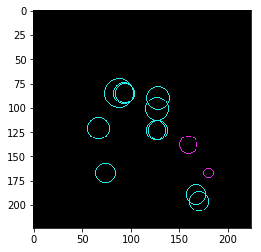

In [63]:
plt.imshow(img)

In [ ]:
edges, peaks = self._hough_detection(X)
        accum, cx, cy, radii = peaks

        image = X

        fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 6))
        image2 = color.gray2rgb(image)
        _, cx, cy, radii = peaks
        for center_y, center_x, radius in zip(cy, cx, radii):
            circy, circx = circle_perimeter(center_y, center_x, radius)
            image2[circy, circx] = (220, 20, 20)

        print("Radius of circles", peaks[3])

        ax[0].imshow(image, cmap=plt.cm.gray)
        ax[1].imshow(edges, cmap=plt.cm.gray)
        ax[2].imshow(image2, cmap=plt.cm.gray)
        display(fig)


In [46]:
%pdb

Automatic pdb calling has been turned OFF


In [3]:
workflow.test_submission()

TypeError: test_submission() missing 2 required positional arguments: 'trained_model' and 'X'

In [ ]:
        folder, X_array = folder_X_array
        transform_img, clf = trained_model
        it = _chunk_iterator(
            X_array, folder=folder, chunk_size=self.chunk_size,
            img_file_extension=self.img_file_extension)
        y_proba = []
        for X in it:
            for i in range(0, len(X), self.test_batch_size):
                # 1) Preprocessing
                X_batch = X[i: i + self.test_batch_size]
                # X_batch = Parallel(n_jobs=self.n_jobs, backend='threading')(
                #     delayed(transform_img)(x) for x in X_batch)
                X_batch = [transform_img(x) for x in X_batch]
                # X is a list of numpy arrrays at this point, convert it to a
                # single numpy array.
                try:
                    X_batch = [x[np.newaxis, :, :, :] for x in X_batch]
                except IndexError:
                    # single channel
                    X_batch = [
                        x[np.newaxis, np.newaxis, :, :] for x in X_batch]
                X_batch = np.concatenate(X_batch, axis=0)

                # 2) Prediction
                y_proba_batch = clf.predict_proba(X_batch)
                y_proba.append(y_proba_batch)
        y_proba = np.concatenate(y_proba, axis=0)
        return y_proba

In [1]:
module_path = 'submissions/image_processing'
element_names = ['image_preprocessor', 'batch_classifier']

In [2]:
submitted_batch_classifier_file = '{}/{}.py'.format(
            module_path, element_names[1])

In [3]:
import imp

In [20]:
batch_classifier = imp.load_source('', submitted_batch_classifier_file)

In [21]:
clf = batch_classifier.BatchClassifier()

In [22]:
clf = clf.fit(None)

In [23]:
trained_model = clf

In [13]:
src = np.load('data/images_quad_77.npy', mmap_mode='r')

In [14]:
labels = pd.read_csv("data/quad77_labels.csv")

In [15]:
def _chunk_iterator(X_array, folder, y_array=None, chunk_size=1024, n_jobs=8,
                    img_file_extension='png'):
    """Generate chunks of images, optionally with their labels.

    Parameters
    ==========

    X_array : ArrayContainer of int
        image ids to load
        (it is named X_array to be coherent with the current API,
         but as said here, it does not represent the data itself,
         only image IDs).

    y_array : vector of int
        labels corresponding to each image from X_array

    chunk_size : int
        chunk size

    folder : str
        folder where the images are

    n_jobs : int
        number of jobs used to load images in parallel

    Yields
    ======

    if y_array is provided (not None):
        it yields each time a tuple (X, y) where X is a list
        of numpy arrays of images and y is a list of ints (labels).
        The length of X and y is `chunk_size` at most (it can be smaller).

    if y_array is not provided (it is None)
        it yields each time X where X is a list of numpy arrays
        of images. The length of X is `chunk_size` at most (it can be
        smaller).
        This is used for testing, where we don't have/need the labels.

    The shape of each element of X in both cases
    is (height, width, color), where color is 1 or 3 or 4 and height/width
    vary according to examples (hence the fact that X is a list instead of
    numpy array).
    """
    for i in range(0, len(X_array), chunk_size):
        #X_chunk = X_array[i:i + chunk_size]
        #filenames = [
        #    os.path.join(folder, '{}.{}'.format(x, img_file_extension))
        #    for x in X_chunk]
        #X = Parallel(n_jobs=n_jobs, backend='threading')(delayed(imread)(
        #    filename) for filename in filenames)
        X = src[i:i + chunk_size, :, :]
        
        y = [list(labels[labels.id == '77_{0}'.format(j)][['x_p', 'y_p', 'radius_p']].itertuples(name=None, index=False)) for j in range(i, i+chunk_size)]
        
        if y_array is not None:
            #y = y_array[i:i + chunk_size]
            yield X, y
        else:
            yield X

In [17]:
it = _chunk_iterator(np.arange(50), None, chunk_size=20)

In [56]:
self_test_batch_size = 5

In [57]:
transform_img = lambda x: x

In [58]:
y_pred = []
for X in it:
    for i in range(0, X.shape[0], self_test_batch_size):
        # 1) Preprocessing
        X_batch = X[i: i + self_test_batch_size]
        # X_batch = Parallel(n_jobs=self.n_jobs, backend='threading')(
        #     delayed(transform_img)(x) for x in X_batch)
        X_batch = [transform_img(x) for x in X_batch]
        # X is a list of numpy arrrays at this point, convert it to a
        # single numpy array.
        #try:
        #    X_batch = [x[np.newaxis, :, :, :] for x in X_batch]
        #except IndexError:
        #    # single channel
        #    X_batch = [
        #        x[np.newaxis, np.newaxis, :, :] for x in X_batch]
        #X_batch = np.concatenate(X_batch, axis=0)

        # 2) Prediction
        y_pred_batch = clf.predict(X_batch)
        y_pred.append(y_pred_batch)
y_pred = np.concatenate(y_pred, axis=0)


Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.4375
Max val:  0.4375
Max val:  0.515625
Max val:  0.515625
Max val:  0.4625
Max val:  0.46875
Max val:  0.4375
Max val:  0.375
Max val:  0.486111111111
Max val:  0.46875
Max val:  0.453125
Max val:  0.421875
Max val:  0.402777777778
Max val:  0.347222222222
Max val:  0.375
Max val:  0.296875
Max val:  0.375
Max val:  0.40625
Max val:  0.390625
Max val:  0.359375
Max val:  0.375
Max val:  0.265625
Max val:  0.203125
Max val:  0.15625
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.0
Max val:  0.15625
Max val:  0.15625
Max val:  0.234375
Max val:  0.3
Max val:  0.458333333333
Max val:  0.359375
Max val:  0.325
Max val:  0.15625
Max val:  0.472222222222


In [16]:
it = _chunk_iterator(np.arange(50), None, y_array=labels, chunk_size=20)

In [17]:
y_true = [y for _, y in it]

In [18]:
y_true = np.array(y_true).ravel().tolist()

In [19]:
y_true

[[],
 [],
 [],
 [],
 [],
 [],
 [(169.0, 141.0, 9.5999999999999996), (189.0, 109.0, 29.399999999999999)],
 [],
 [(167.0, 180.0, 5.25), (138.0, 159.0, 9.0)],
 [(167.0, 6.0, 5.25)],
 [],
 [(103.0, 85.0, 5.5999999999999996)],
 [],
 [],
 [],
 [(137.0, 91.0, 5.75)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(208.0, 205.0, 12.6)]]

In [62]:
for t, p in zip(y_true, y_pred):
    print(t, list(p))

[] []
[] []
[] []
[] [(166, 56, 10)]
[] [(127, 12, 10), (131, 54, 11), (65, 166, 10)]
[] [(197, 173, 10), (127, 141, 10), (126, 140, 11), (196, 173, 11), (199, 174, 10)]
[(169.0, 141.0, 9.5999999999999996), (189.0, 109.0, 29.399999999999999)] [(23, 173, 10), (153, 139, 10), (22, 173, 11), (154, 147, 10), (25, 174, 10), (115, 94, 11)]
[] [(54, 58, 13), (106, 183, 13), (52, 142, 10), (106, 75, 13), (60, 66, 10), (190, 94, 10), (54, 57, 12), (98, 98, 12), (105, 183, 12)]
[(167.0, 180.0, 5.25), (138.0, 159.0, 9.0)] [(85, 94, 10), (121, 67, 11), (123, 126, 10), (123, 128, 10), (101, 127, 12), (85, 88, 15), (167, 74, 10), (189, 167, 10), (196, 170, 10), (90, 128, 12), (85, 93, 11)]
[(167.0, 6.0, 5.25)] [(136, 79, 10), (108, 108, 10), (57, 171, 10), (61, 181, 10), (22, 170, 10), (64, 173, 10), (15, 181, 10), (114, 133, 12), (100, 116, 11)]
[] []
[(103.0, 85.0, 5.5999999999999996)] [(70, 182, 11), (69, 183, 10), (54, 185, 10), (55, 186, 12)]
[] [(182, 182, 10)]
[] [(187, 184, 10)]
[] [(13, 184